In [12]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score




In [13]:
# Loading the dataset
data = pd.read_csv('/Users/bhavanakatta/Downloads/water_potability.csv')

In [14]:
print(data.info())# Quick overview of the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [15]:
# Checking for missing values
print(data.isnull().sum())


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [16]:
# Filling or dropping missing values (example using forward fill)
data.fillna(method='ffill', inplace=True)


In [17]:
# Encoding categorical data if necessary (for example, if 'Location' is categorical)
# data['Location'] = data['Location'].astype('category').cat.codes

# Summary statistics of the dataset
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3275.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.070595,196.369496,22014.092526,7.122277,333.946231,426.205111,14.284970,66.422680,3.966786,0.390110
std,1.592080,32.879761,8768.570828,1.583085,41.261830,80.824064,3.308162,16.204987,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.087664,176.850538,15666.690297,6.127421,307.652451,365.734414,12.065801,55.902806,3.439711,0.000000
50%,7.031684,196.967627,20927.833607,7.130299,333.076588,421.884968,14.218338,66.665028,3.955028,0.000000
75%,8.061338,216.667456,27332.762127,8.114887,360.173794,481.792304,16.557652,77.371974,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


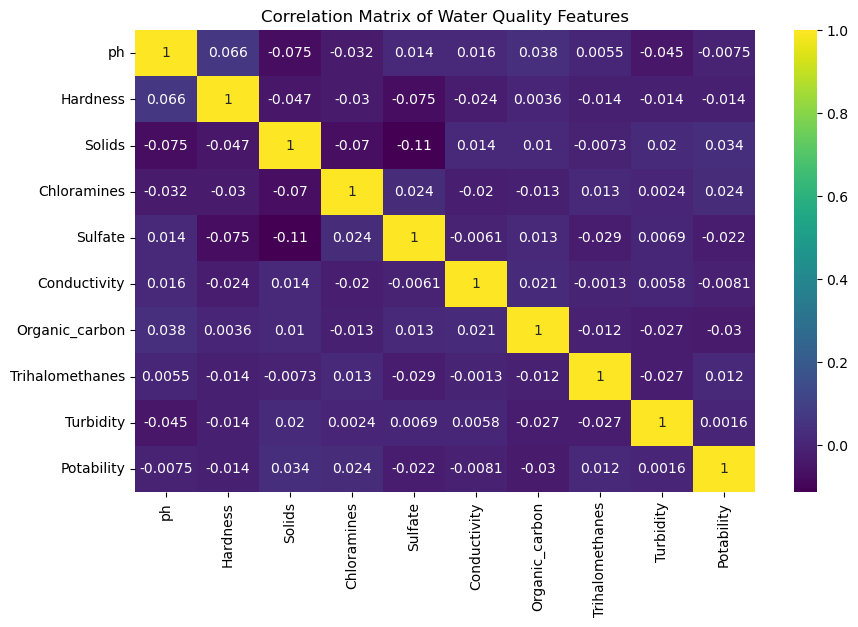

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix of Water Quality Features')
plt.show()

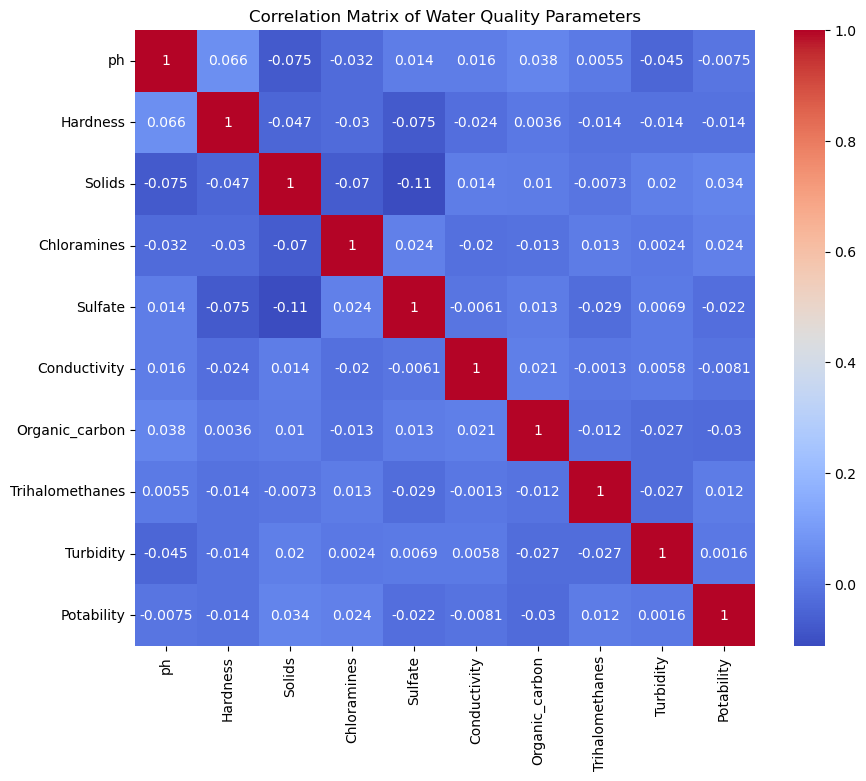

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Water Quality Parameters')
plt.show()

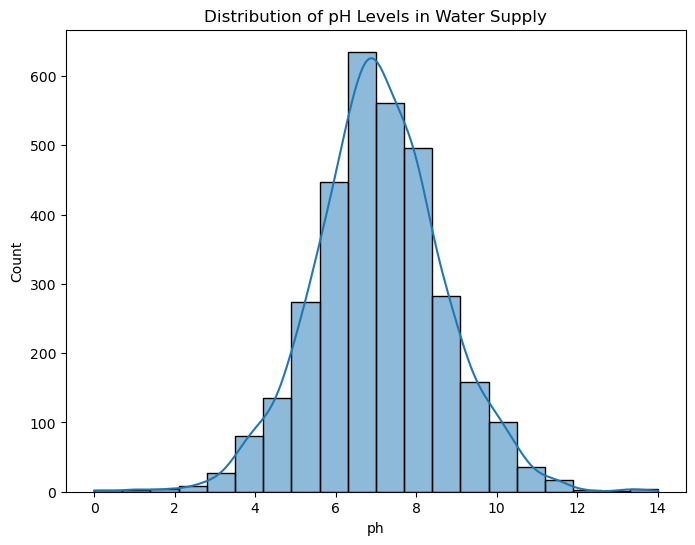

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(data['ph'], bins=20, kde=True)
plt.title('Distribution of pH Levels in Water Supply')
plt.show()

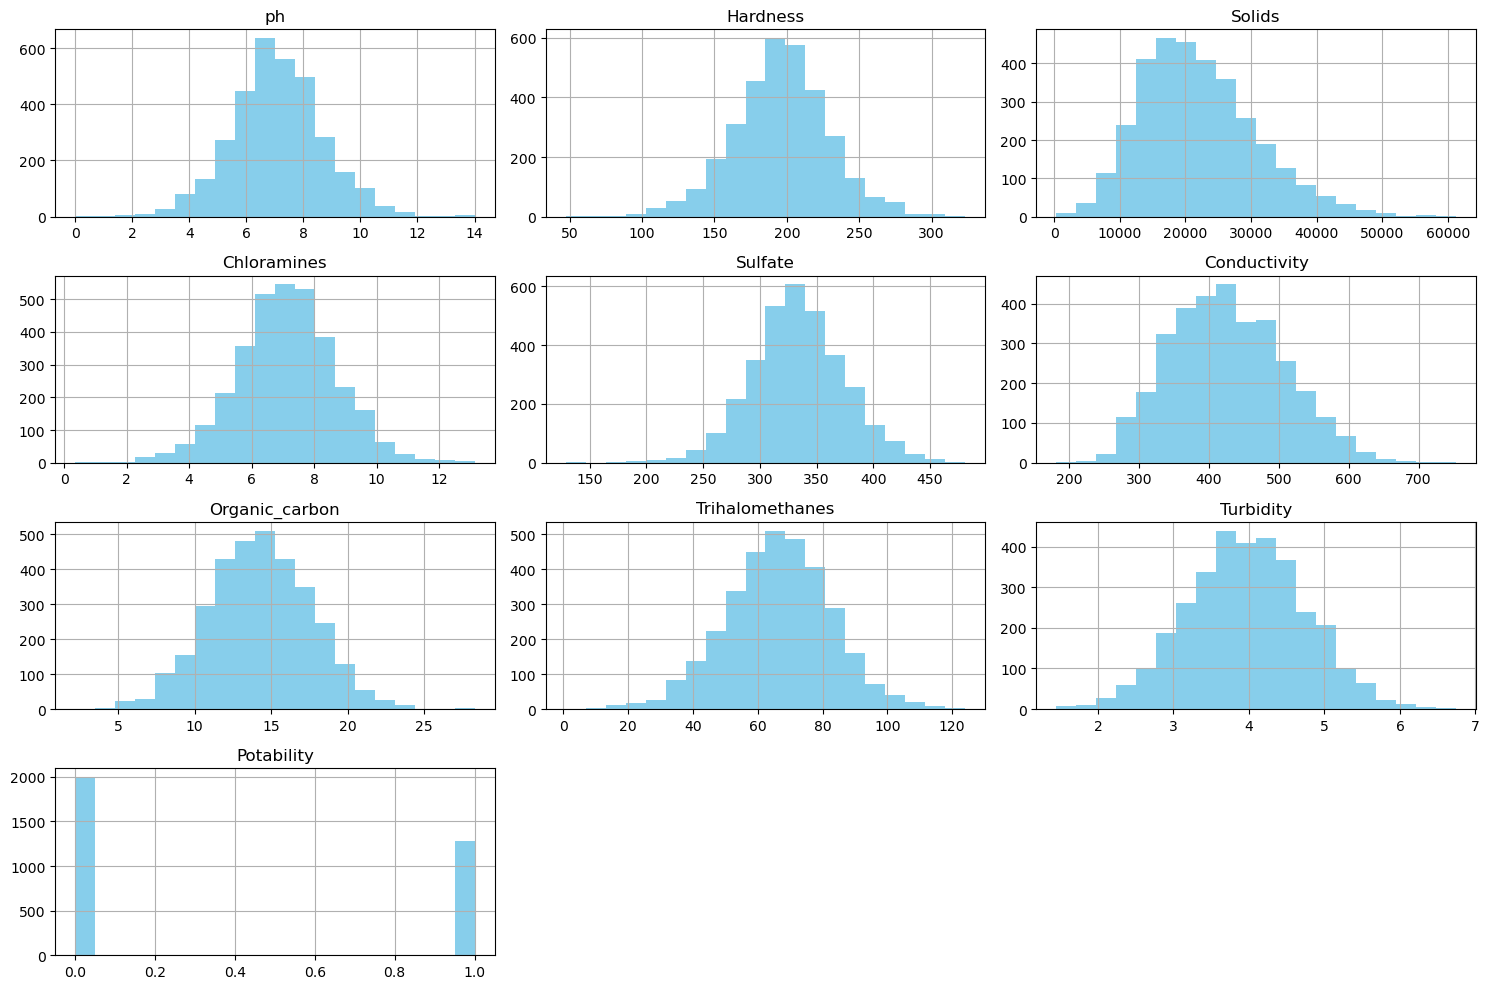

In [23]:
data.hist(bins=20, figsize=(15,10), color='skyblue')
plt.tight_layout()
plt.show()

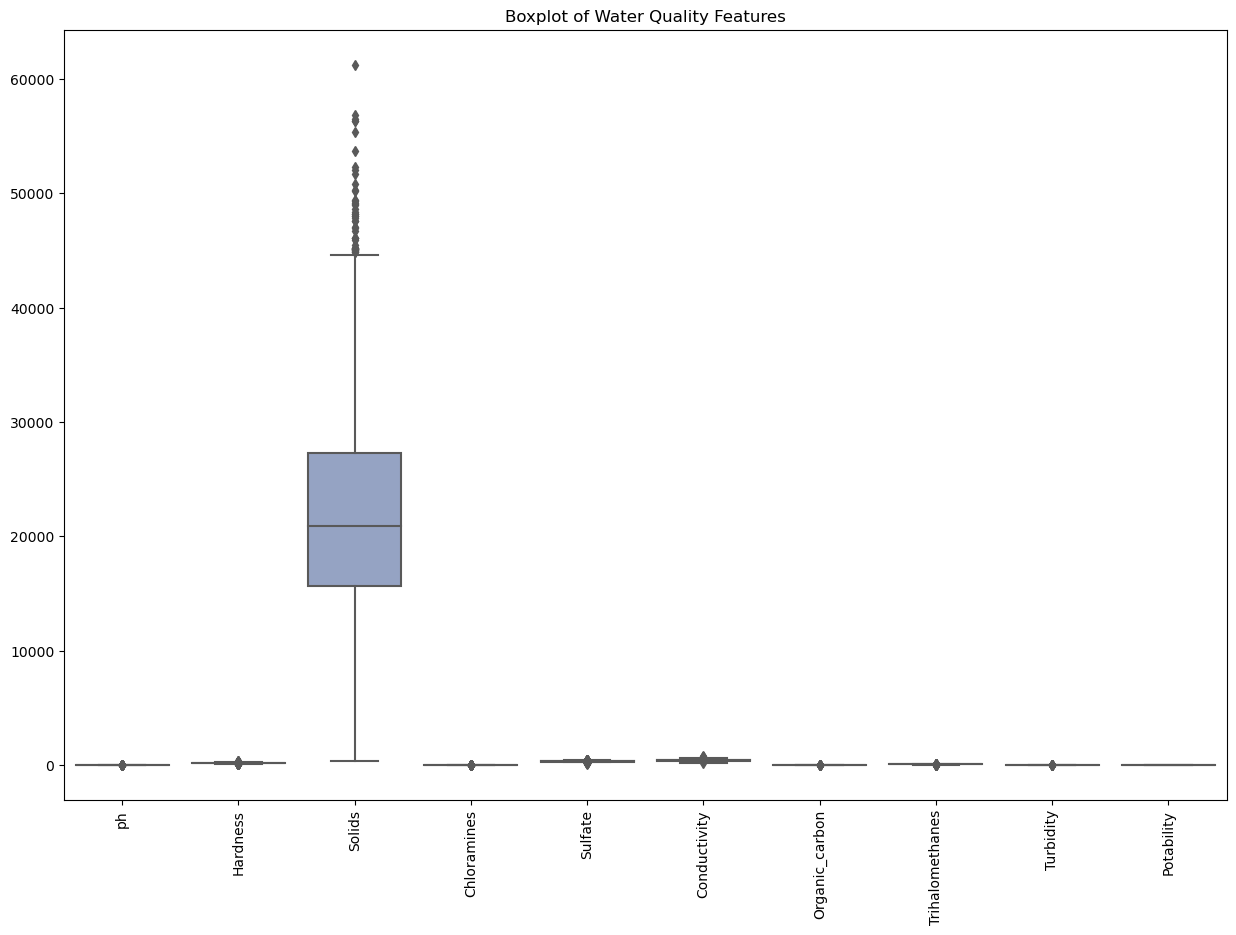

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, palette="Set2")
plt.xticks(rotation=90)
plt.title('Boxplot of Water Quality Features')
plt.show()

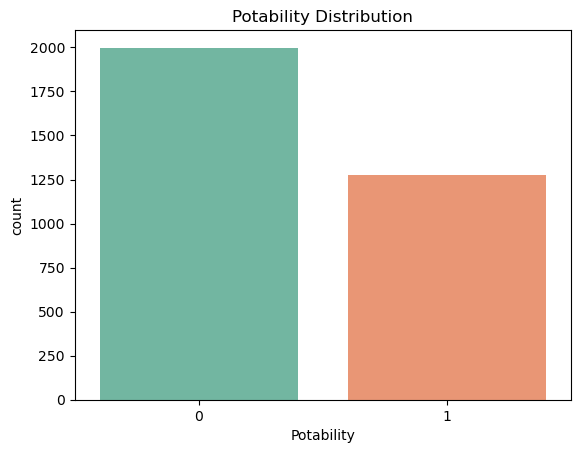

In [26]:
sns.countplot(x='Potability', data=data, palette='Set2')
plt.title('Potability Distribution')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
# Features and target
X = data.drop('Potability', axis=1)
y = data['Potability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for ML algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


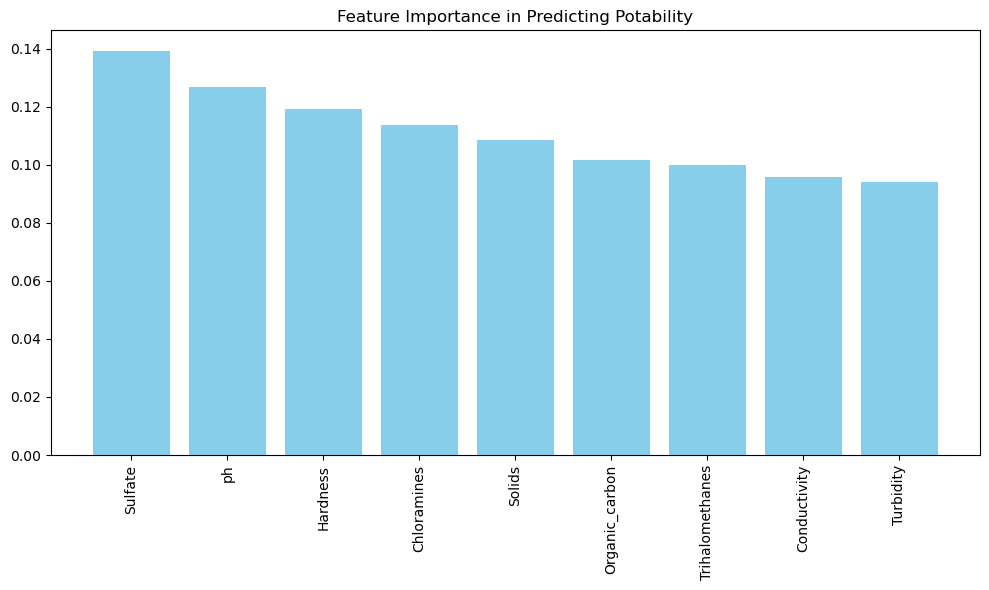

In [31]:
# Feature importance from the Random Forest
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance in Predicting Potability')
plt.bar(range(X.shape[1]), importances[indices], color='skyblue', align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


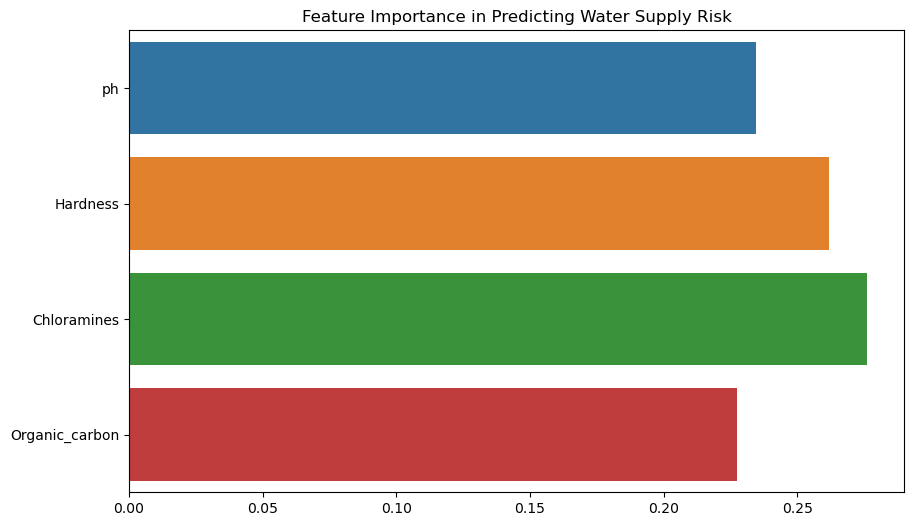

In [40]:
# Visualizing feature importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance in Predicting Water Supply Risk')
plt.show()


In [52]:
# Splitting Data into Features (X) and Target (y)
X = data[['ph', 'Hardness', 'Chloramines', 'Organic_carbon', 'Solids']]  # Features
y = data['Sulfate']  # Target

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data (optional, depending on the model used)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
# Features and target
X = data.drop('Potability', axis=1)
y = data['Potability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for ML algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
data.fillna(data.mean(), inplace=True)

In [62]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

In [63]:
print(data.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [65]:
# Splitting features and target
X = data.drop('Potability', axis=1)
y = data['Potability']

# Train-Test Split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (for better performance in ML algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test_scaled)

# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[549  68]
 [225 141]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       617
           1       0.67      0.39      0.49       366

    accuracy                           0.70       983
   macro avg       0.69      0.64      0.64       983
weighted avg       0.70      0.70      0.68       983

